In [1]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json


In [6]:
! kaggle datasets download imano00/dataset3modified


 98% 111M/113M [00:07<00:00, 23.1MB/s]
100% 113M/113M [00:07<00:00, 16.2MB/s]


In [7]:
# Put on the same directory
from zipfile import ZipFile

# specifying the name of the zip file
file = "dataset3modified.zip"

# open the zip file in read mode
with ZipFile(file, 'r') as zip:
    # list all the contents of the zip file
    zip.printdir()

    # extract all files
    print('extraction...')
    zip.extractall()
    print('Done!')

Streaming output truncated to the last 5000 lines.
dataset(3) - modified/images/train/sad/21539.jpg 2022-12-17 10:42:26         1630
dataset(3) - modified/images/train/sad/21540.jpg 2022-12-17 10:42:26         1806
dataset(3) - modified/images/train/sad/21544.jpg 2022-12-17 10:42:26         1438
dataset(3) - modified/images/train/sad/21546.jpg 2022-12-17 10:42:26         1550
dataset(3) - modified/images/train/sad/21552.jpg 2022-12-17 10:42:26         1306
dataset(3) - modified/images/train/sad/21566.jpg 2022-12-17 10:42:26         1556
dataset(3) - modified/images/train/sad/21583.jpg 2022-12-17 10:42:26         1542
dataset(3) - modified/images/train/sad/21586.jpg 2022-12-17 10:42:26         1302
dataset(3) - modified/images/train/sad/21594.jpg 2022-12-17 10:42:26         1377
dataset(3) - modified/images/train/sad/21610.jpg 2022-12-17 10:42:26         1775
dataset(3) - modified/images/train/sad/21621.jpg 2022-12-17 10:42:26         1258
dataset(3) - modified/images/train/sad/21627.jp

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




dataset(3) - modified/images/validation/neutral/35034.jpg 2022-12-17 10:43:00         1565
dataset(3) - modified/images/validation/neutral/35075.jpg 2022-12-17 10:43:00         1436
dataset(3) - modified/images/validation/neutral/35108.jpg 2022-12-17 10:43:00         1631
dataset(3) - modified/images/validation/neutral/35129.jpg 2022-12-17 10:43:00         1472
dataset(3) - modified/images/validation/neutral/35183.jpg 2022-12-17 10:43:00         1170
dataset(3) - modified/images/validation/neutral/35216.jpg 2022-12-17 10:43:00         1439
dataset(3) - modified/images/validation/neutral/35229.jpg 2022-12-17 10:43:00         1476
dataset(3) - modified/images/validation/neutral/35241.jpg 2022-12-17 10:43:00         1385
dataset(3) - modified/images/validation/neutral/35255.jpg 2022-12-17 10:43:00         1563
dataset(3) - modified/images/validation/neutral/35267.jpg 2022-12-17 10:43:00         1837
dataset(3) - modified/images/validation/neutral/35332.jpg 2022-12-17 10:43:00         160

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report

In [9]:
train_set = ImageDataGenerator().flow_from_directory('/content/dataset(3) - modified/images/train',
                                              target_size = (48,48),
                                              color_mode = "grayscale",
                                              batch_size=128,
                                              class_mode='categorical',
                                              shuffle=True)

test_set = ImageDataGenerator().flow_from_directory('/content/dataset(3) - modified/images/validation',
                                              target_size = (48,48),
                                              color_mode = "grayscale",
                                              batch_size=128,
                                              class_mode='categorical',
                                              shuffle=False)



Found 58454 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [10]:
model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
# Fully connected layer 3rd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.22))

model.add(Dense(7, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [11]:
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [reduce_learningrate]

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])
history = model.fit(train_set,
                    steps_per_epoch=train_set.n//train_set.batch_size,
                    epochs=30,
                    validation_data = test_set,
                    validation_steps = test_set.n//test_set.batch_size,
                    callbacks=callbacks_list
                    )

Epoch 1/30
456/456 [==============================] - 51s 86ms/step - loss: 1.6591 - accuracy: 0.3568 - val_loss: 1.5512 - val_accuracy: 0.4241 - lr: 0.0010
Epoch 2/30
456/456 [==============================] - 32s 71ms/step - loss: 1.2578 - accuracy: 0.5189 - val_loss: 1.2444 - val_accuracy: 0.5250 - lr: 0.0010
Epoch 3/30
456/456 [==============================] - 33s 73ms/step - loss: 1.1258 - accuracy: 0.5739 - val_loss: 1.0904 - val_accuracy: 0.5859 - lr: 0.0010
Epoch 4/30
456/456 [==============================] - 33s 71ms/step - loss: 1.0357 - accuracy: 0.6087 - val_loss: 1.0816 - val_accuracy: 0.6001 - lr: 0.0010
Epoch 5/30
456/456 [==============================] - 33s 72ms/step - loss: 0.9630 - accuracy: 0.6393 - val_loss: 1.2198 - val_accuracy: 0.5509 - lr: 0.0010
Epoch 6/30
456/456 [==============================] - 33s 72ms/step - loss: 0.8911 - accuracy: 0.6672 - val_loss: 1.0482 - val_accuracy: 0.6139 - lr: 0.0010
Epoch 7/30
456/456 [==============================] - 32s 

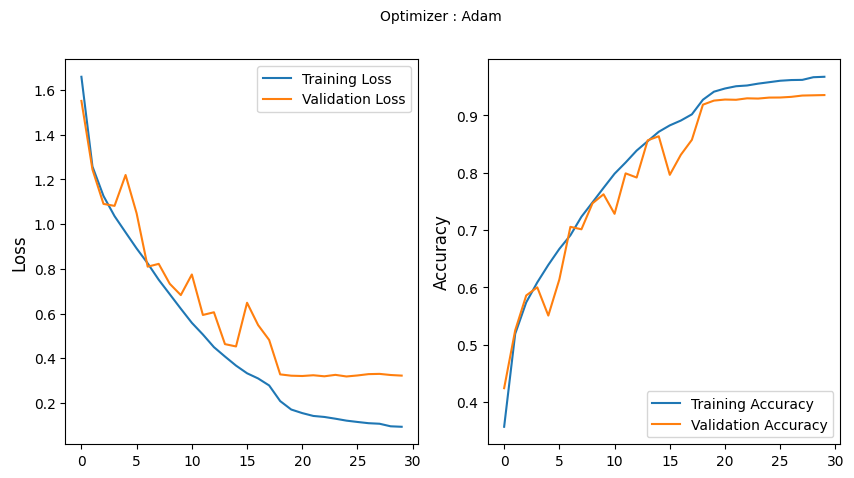

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=12)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=12)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

56/56 [==============================] - 3s 44ms/step


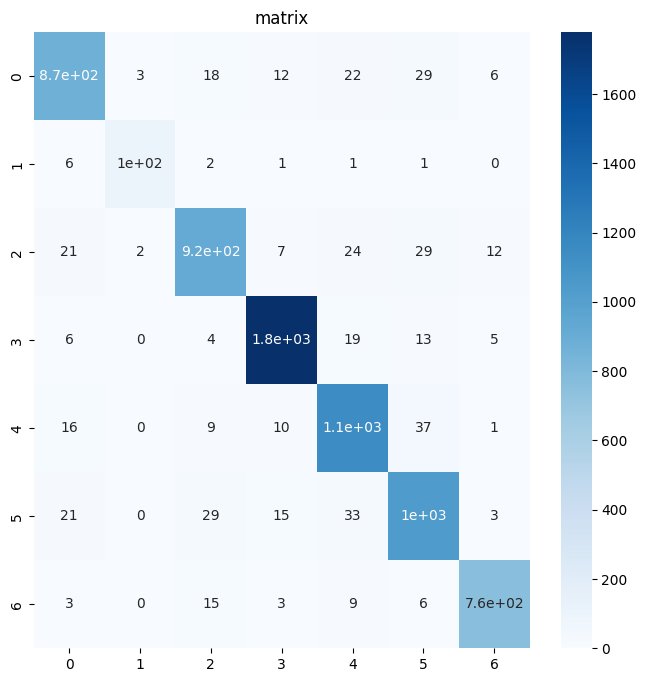

In [13]:
import seaborn as sns
plt.figure (figsize = [8,8])
y_true = test_set.classes
y_pred =  model.predict(test_set)
y_pred= tf.argmax(y_pred, axis = 1).numpy()
cm = confusion_matrix(y_true = y_true, y_pred = y_pred)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.title("matrix")
plt.show()


In [15]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       960
           1       0.95      0.90      0.93       111
           2       0.92      0.91      0.91      1018
           3       0.97      0.97      0.97      1825
           4       0.91      0.94      0.93      1216
           5       0.90      0.91      0.91      1139
           6       0.97      0.95      0.96       797

    accuracy                           0.94      7066
   macro avg       0.94      0.93      0.93      7066
weighted avg       0.94      0.94      0.94      7066

